<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Third_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Third try

I'm going to try another more complex model, because from the CV results of the Logistic regression model, I see that the score, at least on the training set, could get much better.

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

**Loading data**

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

**Pre-processing: StandardScaler**

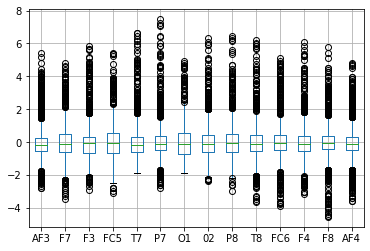

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)
features.boxplot()

**Choosing a model**: This time I'll try with the more complicated **Support vector machines** algorithm. This also distinguishes two classes.

In [0]:
from sklearn.svm import SVC

model = SVC()

In [6]:
score_train = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score_train))

AUC score for trainset: 0.8942757252940738


Waaw you can already see that this score is much better then the score obtained with Logistic regression, which was around 66%.

Maybe we could optimize this model a bit more, so I'm now going to search better hyperparameters inherent to this model: **Parameter tuning** Because I think this is the next logical step, right?

In [7]:
#How do the parameters look like in this model?
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [10]:
from sklearn.model_selection import GridSearchCV

Cs = [0.1,1,10,100,1000]
gammas = ['scale', 'auto']

model = SVC()
params = dict(C=Cs, gamma=gammas)
grid_search = GridSearchCV(model, param_grid=params)
grid_search.fit(features, trainset.label)

print(grid_search.best_estimator_)
print(grid_search.best_params_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
{'C': 100, 'gamma': 'scale'}


Well ok, these results suggest to use C=100 as hyperparameter. I can see why GridsearchCV chooses such a high value, but I have to be carefull that this won't give too much overfitting on the trainset...

In [14]:
model= SVC(C=100)
score_train = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score_train))

AUC score for trainset: 0.9605496725496728


Ok, this very high score is indeed what I expected, but probably this will not give even high results on the test set later on. Looking at the other possibitlities I selected will give us:

In [15]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

0.706 (+/-0.044) for {'C': 0.1, 'gamma': 'scale'}
0.705 (+/-0.045) for {'C': 0.1, 'gamma': 'auto'}
0.812 (+/-0.035) for {'C': 1, 'gamma': 'scale'}
0.811 (+/-0.038) for {'C': 1, 'gamma': 'auto'}
0.870 (+/-0.042) for {'C': 10, 'gamma': 'scale'}
0.870 (+/-0.045) for {'C': 10, 'gamma': 'auto'}
0.890 (+/-0.031) for {'C': 100, 'gamma': 'scale'}
0.889 (+/-0.035) for {'C': 100, 'gamma': 'auto'}
0.875 (+/-0.046) for {'C': 1000, 'gamma': 'scale'}
0.873 (+/-0.047) for {'C': 1000, 'gamma': 'auto'}


There you can see that **C = 10** can also give good performance in this model. I am more willing to use this value instead of the C = 100, preventing overfitting. This will then result in a CV AUC score mentioned below:

In [18]:
model= SVC(C=10)
score_train = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score_train))

AUC score for trainset: 0.9496525014231436
